## Cleaning Life Expectancy Data

In [93]:
# Import modules
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

### Importing and Cleaning the Data 

In [150]:
## Read in the Data

# Create file path
file = Path('Life_Expectancy_UNData.csv')

# Read in Data
df = pd.read_csv(file, encoding="UTF-8", low_memory=False)

In [151]:
## Clean the Data

# Rename location column
df = df.rename(columns={"Region, subregion, country or area *": "Location"})

# Keep only relevant columns
df = df[["Location", "Location code", "Parent code", "Type", "Year", 
         "Male Life Expectancy at Birth (years)", "Female Life Expectancy at Birth (years)"]]

# Change capitalization on location column
df.loc[:, 'Location'] = df['Location'].str.title()

# Replace ... values with NaN (null)
df.replace('...', np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

### Calculate Difference in Life Expectancy

In [152]:
# Convert columns to float using .loc
df.loc[:, 'Female Life Expectancy at Birth (years)'] = df['Female Life Expectancy at Birth (years)'].astype(float)
df.loc[:, 'Male Life Expectancy at Birth (years)'] = df['Male Life Expectancy at Birth (years)'].astype(float)

# Calculate difference in life expectancy
difference_life_expectancy = df['Female Life Expectancy at Birth (years)'] - df['Male Life Expectancy at Birth (years)']

# Assign the calculated difference to a new column using .loc
df.loc[:, 'Difference in Life Expectancy (years)'] = difference_life_expectancy

### Region DataFrame

In [175]:
# Create Regions dataframe
regions_df = df.loc[df['Type'] == 'Region']
regions_df.head()

,Location,Location code,Parent code,Type,Year,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Difference in Life Expectancy (years)
1588,Africa,903,1840,Region,1950.0,36.4,38.8,2.4
1589,Africa,903,1840,Region,1951.0,36.7,39.2,2.5
1590,Africa,903,1840,Region,1952.0,37.2,39.7,2.5
1591,Africa,903,1840,Region,1953.0,37.7,40.2,2.5
1592,Africa,903,1840,Region,1954.0,37.9,40.7,2.8


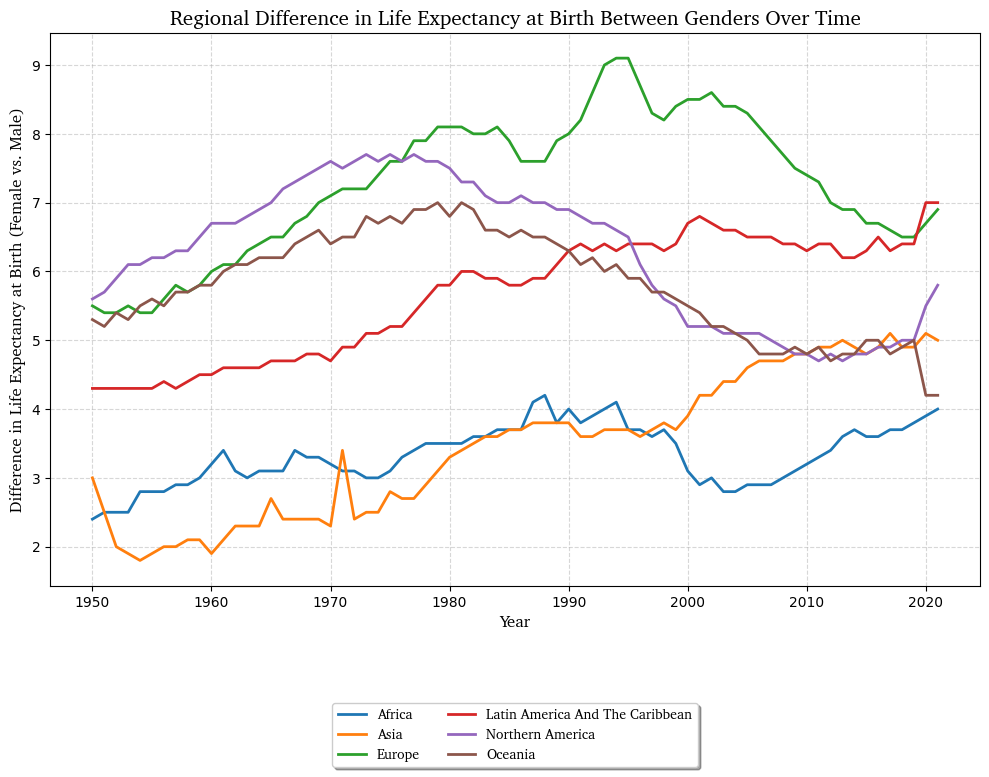

In [158]:
# Plot Region Chart

font_family = 'Charter'

# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Plot each region's difference in life expectancy over time
for location in regions_df['Location'].unique():
    df_location = regions_df[regions_df['Location'] == location]
    plt.plot(df_location['Year'], df_location['Difference in Life Expectancy (years)'],
             linestyle='-', linewidth=2, label=location)

plt.xlabel('Year', fontsize=12, fontname=font_family)  # Apply font to xlabel
plt.ylabel('Difference in Life Expectancy at Birth (Female vs. Male)', fontsize=12, fontname=font_family)  # Apply font to ylabel
plt.title('Regional Difference in Life Expectancy at Birth Between Genders Over Time', fontsize=15, fontname=font_family)  # Apply font to title
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', fancybox=True, shadow=True, fontsize=12, ncol=2,  prop={'family': font_family})  # Apply font family to legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with some transparency
plt.tight_layout()

# Show plot
plt.show()

### European Sub-Regions

In [160]:
# Find Europe location code
location_code = df.loc[df['Location'] == 'Europe', 'Location code'].iloc[0]

# Create European Sub-Region dataframe
europe_subregion_df = df[df['Parent code'] == location_code]
europe_subregion_df.head()

,Location,Location code,Parent code,Type,Year,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Difference in Life Expectancy (years)
10372,Eastern Europe,923,908,Subregion,1950.0,55.5,62.5,7.0
10373,Eastern Europe,923,908,Subregion,1951.0,55.6,62.5,6.9
10374,Eastern Europe,923,908,Subregion,1952.0,57.1,63.8,6.7
10375,Eastern Europe,923,908,Subregion,1953.0,58.1,64.9,6.8
10376,Eastern Europe,923,908,Subregion,1954.0,59.1,65.6,6.5


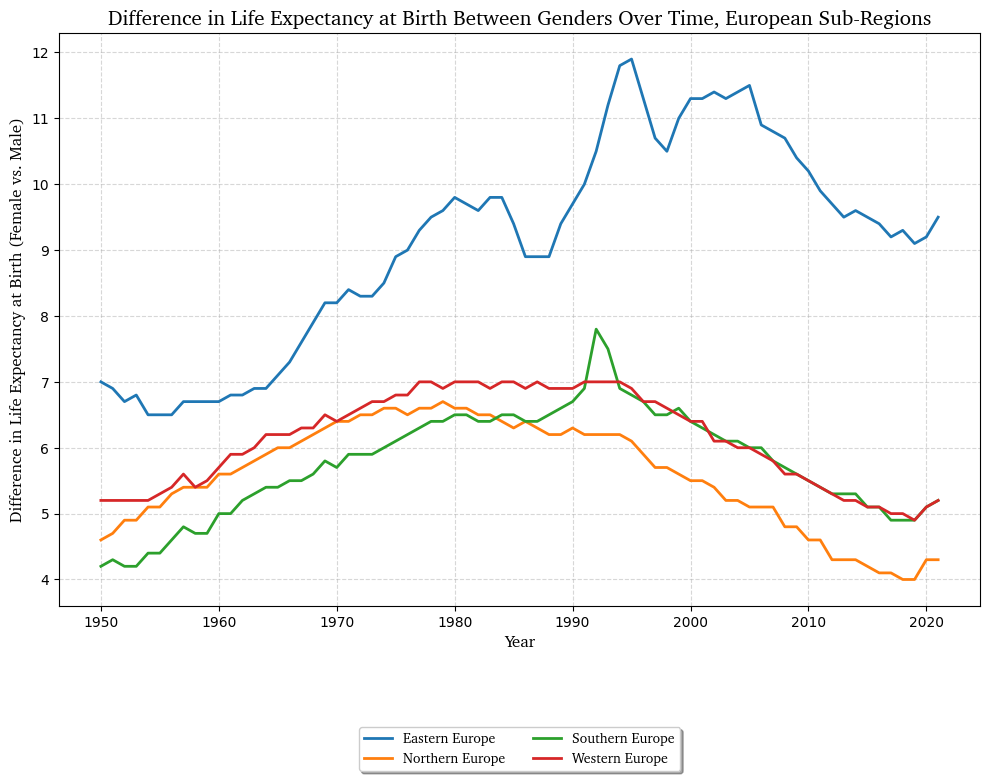

In [163]:
font_family = 'Charter'

# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Plot each region's difference in life expectancy over time
for location in europe_subregion_df['Location'].unique():
    df_location = europe_subregion_df[europe_subregion_df['Location'] == location]
    plt.plot(df_location['Year'], df_location['Difference in Life Expectancy (years)'],
             linestyle='-', linewidth=2, label=location)

plt.xlabel('Year', fontsize=12, fontname=font_family)  # Apply font to xlabel
plt.ylabel('Difference in Life Expectancy at Birth (Female vs. Male)', fontsize=12, fontname=font_family)  # Apply font to ylabel
plt.title('Difference in Life Expectancy at Birth Between Genders Over Time, European Sub-Regions', fontsize=15, fontname=font_family)  # Apply font to title
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', fancybox=True, shadow=True, fontsize=12, ncol=2,  prop={'family': font_family})  # Apply font family to legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with some transparency
plt.tight_layout()

# Show plot
plt.show()

### Eastern European Countries

In [167]:
# Find Europe location code
location_code = df.loc[df['Location'] == 'Eastern Europe', 'Location code'].iloc[0]

# Create European Sub-Region dataframe
eastern_europe_df = df[df['Parent code'] == location_code]
eastern_europe_df.head()

,Location,Location code,Parent code,Type,Year,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Difference in Life Expectancy (years)
10444,Belarus,112,923,Country/Area,1950.0,55.3,63.4,8.1
10445,Belarus,112,923,Country/Area,1951.0,55.5,63.7,8.2
10446,Belarus,112,923,Country/Area,1952.0,57.0,64.9,7.9
10447,Belarus,112,923,Country/Area,1953.0,58.2,65.8,7.6
10448,Belarus,112,923,Country/Area,1954.0,59.4,66.7,7.3


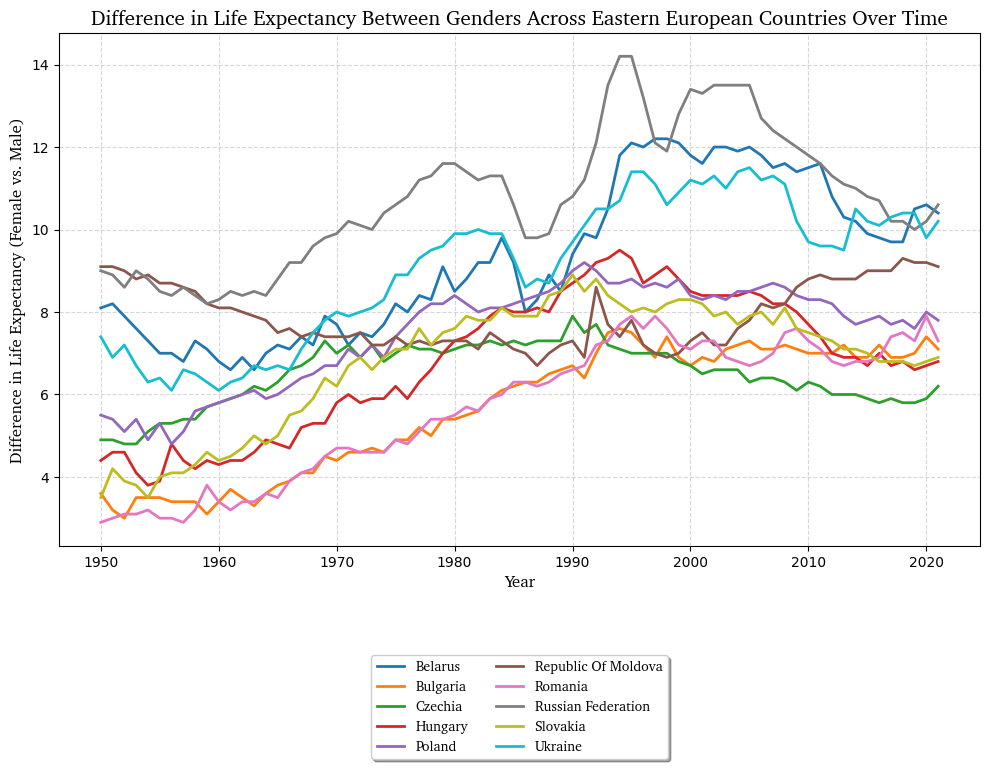

In [168]:
font_family = 'Charter'

# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability

# Plot each region's difference in life expectancy over time
for location in eastern_europe_df['Location'].unique():
    df_location = eastern_europe_df[eastern_europe_df['Location'] == location]
    plt.plot(df_location['Year'], df_location['Difference in Life Expectancy (years)'],
             linestyle='-', linewidth=2, label=location)

plt.xlabel('Year', fontsize=12, fontname=font_family)  # Apply font to xlabel
plt.ylabel('Difference in Life Expectancy (Female vs. Male)', fontsize=12, fontname=font_family)  # Apply font to ylabel
plt.title('Difference in Life Expectancy Between Genders Across Eastern European Countries Over Time', fontsize=15, fontname=font_family)  # Apply font to title
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', fancybox=True, shadow=True, fontsize=12, ncol=2,  prop={'family': font_family})  # Apply font family to legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines with some transparency
plt.tight_layout()

# Show plot
plt.show()

### Other Sub-Regions

In [176]:
unique_regions = regions_df['Location'].unique()
unique_regions

array(['Africa', 'Asia', 'Europe', 'Latin America And The Caribbean',
       'Northern America', 'Oceania'], dtype=object)

In [191]:
region_dataframes = {}

# Iterate over unique regions
for region_name in unique_regions:
    # Find location code for the current region
    location_code = df.loc[df['Location'] == region_name, 'Location code'].iloc[0]
    
    # Create sub-region DataFrame for the current region
    region_subregion_df = df[df['Parent code'] == location_code]
    
    # Rename the DataFrame based on the region name
    region_dataframes[region_name] = region_subregion_df
    
    # Optional: Print the first few rows of the sub-region DataFrame
    #print(f"Sub-region DataFrame for {region_name}:")
    #print(region_subregion_df.head())
    #print()  # Print an empty line for clarity

region_dataframes['Africa']

,Location,Location code,Parent code,Type,Year,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Difference in Life Expectancy (years)
1660,Eastern Africa,910,903,Subregion,1950.0,37.1,40.3,3.2
1661,Eastern Africa,910,903,Subregion,1951.0,37.3,40.6,3.3
1662,Eastern Africa,910,903,Subregion,1952.0,37.6,40.9,3.3
1663,Eastern Africa,910,903,Subregion,1953.0,38.1,41.4,3.3
1664,Eastern Africa,910,903,Subregion,1954.0,38.5,41.9,3.4
...,...,...,...,...,...,...,...,...
4967,Western Africa,914,903,Subregion,2017.0,55.6,57.2,1.6
4968,Western Africa,914,903,Subregion,2018.0,55.9,57.4,1.5
4969,Western Africa,914,903,Subregion,2019.0,56.2,57.8,1.6
4970,Western Africa,914,903,Subregion,2020.0,55.8,57.7,1.9
